In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from numpy.linalg import inv

from astropy.table import Table, Column, vstack, hstack, unique, SortedArray,SCEngine
import astropy.units as u

from astropy.io import fits, ascii 

import glob
import os

import numpy
from scipy.signal import medfilt
from scipy.interpolate import interp1d
from numba import njit
import tqdm
from pandas import DataFrame 


In [2]:
galaxy_tabl = Table.read("andes_glxy_zLT03.fits")   # reads in table from previous code

PETAL_LOC = (galaxy_tabl['PETAL_LOC'].data)  # load each column as an array
NIGHT = (galaxy_tabl['NIGHT'].data)  # load each column as an array
TILEID = (galaxy_tabl['TILEID'].data)  # load each column as an array
FIBER = (galaxy_tabl['FIBER'].data) 
S_N_r = (galaxy_tabl['S_N_r'].data) 
Z = (galaxy_tabl['Z'].data) 

# combined = np.vstack((PETAL, TILEID,NIGHT)).T  # combines each element of each array together 
# print(combined)
# print(len(PETAL_LOC))
# print(len(NIGHT))
# print(len(TILEID))
# print(len(FIBER))
print(np.max(S_N_r))
print(np.max(Z))
print(np.min(S_N_r))
print(np.min(Z))
print(np.max(NIGHT))
print(np.min(NIGHT))

291.8938
0.2999960962861734
2.2775514e-05
0.0020102204577112964
20200315
20200219


In [3]:
rspec_final = np.load('andes_glxy_zLT03_rspec_final.npz',allow_pickle=True)

In [4]:
lst = rspec_final.files

for item in lst:
    print(item)
    print(rspec_final[item])

flux
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
wave
[4000.         4000.6933806  4001.3868814  ... 7997.2271986  7998.61347915
 8000.        ]
tab_idx
[    0     1     2 ... 14903 14904 14905]
overwrite
True


In [5]:
rspec_final.files

['flux', 'wave', 'tab_idx', 'overwrite']

In [6]:
rspec_flux = rspec_final['flux']
rspec_wave = rspec_final['wave']

In [7]:
print(np.max(rspec_flux))
print(np.min(rspec_flux))
print(np.max(rspec_wave))
print(np.min(rspec_wave))

4002177.723369041
-1656297.1183121584
8000.0
3999.9999999999995


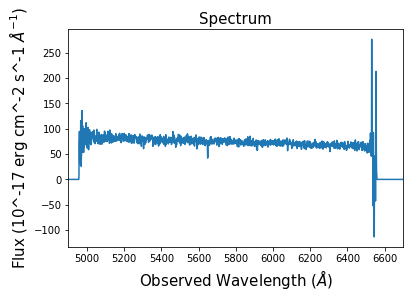

In [10]:
plt.title('Spectrum', fontsize = 15)  #  places a title and sets font size
plt.xlabel('Observed Wavelength ($\AA$)', fontsize = 15)   # places a label on the x axis and sets font size 
plt.ylabel('Flux (10^-17 erg cm^-2 s^-1 $\AA^{-1}$)', fontsize = 15) # places a label on the y axis and sets font size

plt.xlim(4900, 6700)

plt.plot(rspec_wave, rspec_flux[0])  # plots the lists we just created using a function from matplotlib.pyplot. This plots both the x and y lists.
plt.show() 



[0. 0. 0. ... 0. 0. 0.]
(4000,)
(4000,)
-51.05716622319417
44.14398838946723


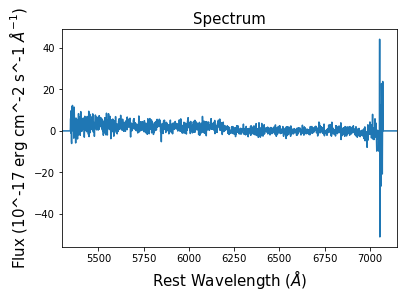

In [11]:
for i in range(rspec_flux.shape[0]):
    spec_flux = rspec_flux[i]
    gdp = spec_flux != 0.
    norm = np.median(spec_flux[gdp])
    rspec_f = rspec_flux[i] / norm

print(rspec_f)

print(rspec_f.shape)
print(rspec_wave.shape)
print(np.min(rspec_f))
print(np.max(rspec_f))


plt.title('Spectrum', fontsize = 15)  #  places a title and sets font size
plt.xlabel('Rest Wavelength ($\AA$)', fontsize = 15)   # places a label on the x axis and sets font size 
plt.ylabel('Flux (10^-17 erg cm^-2 s^-1 $\AA^{-1}$)', fontsize = 15) # places a label on the y axis and sets font size

plt.xlim(5300, 7150)

plt.plot(rspec_wave, rspec_f)  # plots the lists we just created using a function from matplotlib.pyplot. This plots both the x and y lists.
plt.show() 

In [ ]:
import umap
fit = umap.UMAP()

In [ ]:
em = fit.fit_transform(rspec_flux)
x = em[:,0]
y = em[:,1]

In [ ]:
plt.figure(figsize = (8,7))
plt.scatter(x, y)
plt.show()

In [ ]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, LassoSelectTool, BoxZoomTool
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform

In [ ]:
desc = [str(i) for i in np.arange(rspec_flux.shape[0])]

print(len(rspec_flux))

In [ ]:
%matplotlib notebook
# TILEID, NIGHT, TILEID and FIBER

In [ ]:
source = ColumnDataSource(data=dict(x=x, y=y, desc=desc,PETAL_LOC = PETAL_LOC, NIGHT = NIGHT, FIBER = FIBER, S_N_r = S_N_r, Z = Z, TILEID = TILEID))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('desc', '@desc'),
    ('PETAL_LOC','@PETAL_LOC'),
    ('NIGHT','@NIGHT'),
    ('FIBER','@FIBER'),
    ('S_N_r','@S_N_r'),
    ('Z','@Z'),
    ('TILEID','@TILEID'),
])
mapper = LinearColorMapper(palette=plasma(256), low=min(S_N_r), high=max(S_N_r))

p = figure(plot_width=400, plot_height=400, tools=[hover], title="UMAP-S_N_r")
p.circle('x', 'y', size=10, source=source,
         fill_color=transform('S_N_r', mapper))
p.add_tools(BoxZoomTool())

#output_file('test.html')
show(p)

In [ ]:
source = ColumnDataSource(data=dict(x=x, y=y, desc=desc,PETAL_LOC = PETAL_LOC, NIGHT = NIGHT, FIBER = FIBER, S_N_r = S_N_r, Z = Z, TILEID = TILEID))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('desc', '@desc'),
    ('PETAL_LOC','@PETAL_LOC'),
    ('NIGHT','@NIGHT'),
    ('FIBER','@FIBER'),
    ('S_N_r','@S_N_r'),
    ('Z','@Z'),
    ('TILEID','@TILEID'),
])
mapper = LinearColorMapper(palette=plasma(256), low=min(Z), high=max(Z))

p = figure(plot_width=400, plot_height=400, tools=[hover], title="UMAP-Z")
p.circle('x', 'y', size=10, source=source,
         fill_color=transform('Z', mapper))
p.add_tools(BoxZoomTool())

#output_file('test.html')
show(p)

In [ ]:
source = ColumnDataSource(data=dict(x=x, y=y, desc=desc,PETAL_LOC = PETAL_LOC, NIGHT = NIGHT, FIBER = FIBER, S_N_r = S_N_r, Z = Z, TILEID = TILEID))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('desc', '@desc'),
    ('PETAL_LOC','@PETAL_LOC'),
    ('NIGHT','@NIGHT'),
    ('FIBER','@FIBER'),
    ('S_N_r','@S_N_r'),
    ('Z','@Z'),
    ('TILEID','@TILEID'),
])
mapper = LinearColorMapper(palette=plasma(256), low=min(NIGHT), high=max(NIGHT))

p = figure(plot_width=400, plot_height=400, tools=[hover], title="UMAP-NIGHT")
p.circle('x', 'y', size=10, source=source,
         fill_color=transform('NIGHT', mapper))
p.add_tools(BoxZoomTool())

#output_file('test.html')
show(p)

In [ ]:
#PETAL_LOC, NIGHT, TILEID, and FIBER 
# 8  20200304   63075  4261
# 9  20200315   63229  4564

In [ ]:
from desi_sandbox.spectra import io                                     

spec = dict()                                                           

spec['PETAL_LOC'] = 6                                                   

spec['TILEID'] = 70510                                                  

spec['NIGHT'] = 20200304                                                

spec['FIBER'] = 3217                                                    

flux, ivar, wave = io.load_andes_obj(spec)  

plt.title('Spectrum- ind- 14091, SN- 68.731', fontsize = 15)  #  places a title and sets font size
plt.xlabel('Observed Wavelength', fontsize = 15)   # places a label on the x axis and sets font size 
plt.ylabel('$\\mathrm{flux\\,[10^{-17}\\, erg \\, cm^{-2} \\, s^{-1} \\, \\AA^{-1}] }$', fontsize = 15) # places a label on the y axis and sets font size

plt.plot(wave, flux)  # plots the lists we just created using a function from matplotlib.pyplot. This plots both the x and y lists.
plt.show() 

In [ ]:
# spec = dict()                                                           

# spec['PETAL_LOC'] = 7                                                   

# spec['TILEID'] = 70510                                                  

# spec['NIGHT'] = 20200304                                                

# spec['FIBER'] = 3564                                                    

# flux, ivar, wave = io.load_andes_obj(spec)  

# plt.title('Spectrum- 7-70510-20200304-3564', fontsize = 15)  #  places a title and sets font size
# plt.xlabel('Observed Wavelength', fontsize = 15)   # places a label on the x axis and sets font size 
# plt.ylabel('$\\mathrm{flux\\,[10^{-17}\\, erg \\, cm^{-2} \\, s^{-1} \\, \\AA^{-1}] }$', fontsize = 15) # places a label on the y axis and sets font size

# plt.plot(wave, flux)  # plots the lists we just created using a function from matplotlib.pyplot. This plots both the x and y lists.
# plt.show() 
# 9  20200315   63229  4564

In [ ]:
spec = dict()                                                           

spec['PETAL_LOC'] = 7                                                   

spec['TILEID'] = 70510                                                  

spec['NIGHT'] = 20200304                                                

spec['FIBER'] = 3995                                                    

flux, ivar, wave = io.load_andes_obj(spec)  

plt.title('Spectrum- ind- 14207, SN- 73.382', fontsize = 15)  #  places a title and sets font size
plt.xlabel('Observed Wavelength', fontsize = 15)   # places a label on the x axis and sets font size 
plt.ylabel('$\\mathrm{flux\\,[10^{-17}\\, erg \\, cm^{-2} \\, s^{-1} \\, \\AA^{-1}] }$', fontsize = 15) # places a label on the y axis and sets font size

plt.plot(wave, flux)  # plots the lists we just created using a function from matplotlib.pyplot. This plots both the x and y lists.
plt.show() 